# Aquatic microbial communities subjected to various antibiotic treatments     
We are investigating aquatic microbial communities subjected to various antibiotic treatments. This analysis uses the Waveome tool, encompassing data preparation, Waveome kernel search, and visualization. Sampling occurred over time, and we sequenced microbes from two size fractions: those larger than 3 µm and those between 0.22 µm and 3 µm. For both fractions, we analyzed 16S, 18S, and ITS1 sequences. This resulted in a dataset with 3 markers, 2 size fractions, 4 treatments, and 7 time points. Our goal is to detect and quantify changes in microbiome composition over time and explore their association with environmental co-variables measured at each time point, such as nutrients, chlorophyll, temperature, and pH.

## Setup

In [1]:
from waveome.model_search import GPSearch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

Here, we will read the values of ASV microbiome (16S) data and the sample data. In the following code, you need to change `<PATH_TO_FILE>` to the corresponding directory where you have saved the `.txt` files.

In [2]:
otu_table = pd.read_csv("Project/otu_table.txt",
                        header=0, index_col=0, sep ='\t')
sam_table = pd.read_csv("Project/sam_table.txt",
                        header=0, index_col=0, sep ='\t')


In [3]:
otu_table.head(5)

,ASV1,ASV2,ASV3,ASV4,ASV5,ASV6,ASV7,ASV8,ASV9,ASV10,...,ASV1250,ASV1266,ASV1274,ASV1328,ASV1364,ASV1498,ASV1499,ASV1538,ASV1760,ASV2296
CELF1,10,12,5,6,10,0,8,6,0,7,...,0,0,0,0,0,0,0,0,0,0
CELF10,8,7,9,10,10,0,10,5,0,0,...,0,0,0,0,0,0,0,0,0,0
CELF11,11,5,11,14,10,0,0,12,0,0,...,1,0,0,0,0,0,0,0,0,0
CELF12,13,8,13,7,10,15,0,9,5,7,...,0,0,0,0,0,0,0,0,0,0
CELF13,11,8,14,9,10,15,4,9,7,5,...,0,0,0,0,0,0,0,0,0,0


In [4]:
sam_table.dtypes

sample_ID                 object
treatment                 object
time_points               object
conc_ug_ul               float64
pH                       float64
temp_C                   float64
turb_FNU                 float64
TDS_ppm                  float64
elec_ms_cm               float64
conduc_mS                float64
POR                      float64
DO_pct                   float64
do_ppm                   float64
salinity_PSU             float64
mVpH                     float64
ms_cm4                   float64
dna_extraction_ID         object
sampling_date             object
time_days                  int64
size_fraction__um         object
treatment_description     object
antibiotic_added          object
size_um                   object
N2_mg                    float64
N2_ug                    float64
C_mg                     float64
C_ug                     float64
C_N                      float64
nitrate_nitrite_uM       float64
phosphate_uM             float64
salicylic.

In [5]:
#sam_table['time_points'] = sam_table['time_points'].str[1:].astype(float)
sam_table['time_days'] = sam_table['time_days'].astype(float)
sam_table['salicylic.acid_uM'] = sam_table['salicylic.acid_uM'].astype(float)

In [6]:
sam_table['size_fraction__um']

CELF1     3_00
CELF10    3_00
CELF11    3_00
CELF12    3_00
CELF13    3_00
CELF14    3_00
CELF15    3_00
CELF16    3_00
CELF17    3_00
CELF18    3_00
CELF19    3_00
CELF2     3_00
CELF20    3_00
CELF21    3_00
CELF22    3_00
CELF23    3_00
CELF24    3_00
CELF25    3_00
CELF26    3_00
CELF27    3_00
CELF28    3_00
CELF29    3_00
CELF3     3_00
CELF30    3_00
CELF31    3_00
CELF4     3_00
CELF5     3_00
CELF6     3_00
CELF7     3_00
CELF8     3_00
CELF9     3_00
CESF1     0_22
CESF10    0_22
CESF11    0_22
CESF12    0_22
CESF13    0_22
CESF14    0_22
CESF15    0_22
CESF16    0_22
CESF17    0_22
CESF18    0_22
CESF19    0_22
CESF2     0_22
CESF20    0_22
CESF21    0_22
CESF22    0_22
CESF23    0_22
CESF24    0_22
CESF25    0_22
CESF26    0_22
CESF27    0_22
CESF28    0_22
CESF3     0_22
CESF4     0_22
CESF5     0_22
CESF6     0_22
CESF7     0_22
CESF8     0_22
CESF9     0_22
Name: size_fraction__um, dtype: object

In [7]:
sam_table['dna_extraction_ID']

CELF1      CELF1
CELF10    CELF10
CELF11    CELF11
CELF12    CELF12
CELF13    CELF13
CELF14    CELF14
CELF15    CELF15
CELF16    CELF16
CELF17    CELF17
CELF18    CELF18
CELF19    CELF19
CELF2      CELF2
CELF20    CELF20
CELF21    CELF21
CELF22    CELF22
CELF23    CELF23
CELF24    CELF24
CELF25    CELF25
CELF26    CELF26
CELF27    CELF27
CELF28    CELF28
CELF29    CELF29
CELF3      CELF3
CELF30    CELF30
CELF31    CELF31
CELF4      CELF4
CELF5      CELF5
CELF6      CELF6
CELF7      CELF7
CELF8      CELF8
CELF9      CELF9
CESF1      CESF1
CESF10    CESF10
CESF11    CESF11
CESF12    CESF12
CESF13    CESF13
CESF14    CESF14
CESF15    CESF15
CESF16    CESF16
CESF17    CESF17
CESF18    CESF18
CESF19    CESF19
CESF2      CESF2
CESF20    CESF20
CESF21    CESF21
CESF22    CESF22
CESF23    CESF23
CESF24    CESF24
CESF25    CESF25
CESF26    CESF26
CESF27    CESF27
CESF28    CESF28
CESF3      CESF3
CESF4      CESF4
CESF5      CESF5
CESF6      CESF6
CESF7      CESF7
CESF8      CESF8
CESF9      CES

In [8]:
sam_table['sample_ID']

CELF1      2M
CELF10    13M
CELF11    14M
CELF12    15M
CELF13    16M
CELF14    17M
CELF15    18M
CELF16    20M
CELF17    21M
CELF18    22M
CELF19    24M
CELF2      3M
CELF20    25M
CELF21    26M
CELF22    27M
CELF23    28M
CELF24    29M
CELF25    30M
CELF26    31M
CELF27    32M
CELF28    33M
CELF29    35M
CELF3      4M
CELF30     1M
CELF31     5M
CELF4      7M
CELF5      8M
CELF6      9M
CELF7     10M
CELF8     11M
CELF9     12M
CESF1      7S
CESF10    16S
CESF11    17S
CESF12    18S
CESF13    19S
CESF14    20S
CESF15    21S
CESF16    22S
CESF17    23S
CESF18    24S
CESF19    25S
CESF2      8S
CESF20    26S
CESF21    27S
CESF22    28S
CESF23    29S
CESF24    30S
CESF25    31S
CESF26    32S
CESF27    33S
CESF28    34S
CESF3      9S
CESF4     10S
CESF5     11S
CESF6     12S
CESF7     13S
CESF8     14S
CESF9     15S
Name: sample_ID, dtype: object

In [9]:
sam_table['antibiotic_added']

CELF1                 NaN
CELF10                NaN
CELF11        florfenicol
CELF12    oxytetracycline
CELF13    oxytetracycline
CELF14                NaN
CELF15                NaN
CELF16    oxytetracycline
CELF17        florfenicol
CELF18    oxytetracycline
CELF19                NaN
CELF2     oxytetracycline
CELF20                NaN
CELF21    oxytetracycline
CELF22                NaN
CELF23        florfenicol
CELF24                NaN
CELF25                NaN
CELF26        florfenicol
CELF27        florfenicol
CELF28    oxytetracycline
CELF29                NaN
CELF3                 NaN
CELF30                NaN
CELF31                NaN
CELF4                 NaN
CELF5         florfenicol
CELF6                 NaN
CELF7                 NaN
CELF8                 NaN
CELF9         florfenicol
CESF1     oxytetracycline
CESF10                NaN
CESF11        florfenicol
CESF12                NaN
CESF13        florfenicol
CESF14    oxytetracycline
CESF15                NaN
CESF16      

In [10]:
sam_table.columns[3:len(sam_table)].tolist()

['conc_ug_ul',
 'pH',
 'temp_C',
 'turb_FNU',
 'TDS_ppm',
 'elec_ms_cm',
 'conduc_mS',
 'POR',
 'DO_pct',
 'do_ppm',
 'salinity_PSU',
 'mVpH',
 'ms_cm4',
 'dna_extraction_ID',
 'sampling_date',
 'time_days',
 'size_fraction__um',
 'treatment_description',
 'antibiotic_added',
 'size_um',
 'N2_mg',
 'N2_ug',
 'C_mg',
 'C_ug',
 'C_N',
 'nitrate_nitrite_uM',
 'phosphate_uM',
 'salicylic.acid_uM',
 'nitrite_uM',
 'nitrate_uM',
 'chl_a_mg_L']

Remove unnecessary columns and repaeated

In [11]:
sam_table = sam_table.drop(columns=['sample_ID', 'sample_ID', 'dna_extraction_ID', 'treatment_description','size_fraction__um', 'time_points','sampling_date', 'antibiotic_added'])

In [12]:
gps = GPSearch(X=sam_table,
                Y=otu_table,
                #unit_col='sample_ID',
                categorical_vars=['treatment', 'size_um'],
                outcome_likelihood= 'gaussian')#'poisson')

Converting treatment to numeric
Converting size_um to numeric


In [ ]:
gps.run_search(
    random_seed=9102
)
with open('Project/gps_output.pkl', 'wb') as f:
    pickle.dump(gps, f)

Kernel search:   1%|▌                                                                                         | 3/463 [11:06<27:49:17, 217.73s/it]

In [25]:
with open('Project/gps_output.pkl', 'wb') as f:
    pickle.dump(gps, f)

In [26]:
with open('Project/gps_output.pkl', 'rb') as f:
    gps = pickle.load(f)

In [ ]:
gps.plot_heatmap(var_cutoff=0.1)

(<Figure size 2000x500 with 3 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[time_days](33.2%)'}, xlabel='time_days'>,
         <Axes: title={'center': 'squared_exponential[C_N](45.0%)'}, xlabel='C_N'>,
         <Axes: title={'center': 'residuals (21.7%)'}, xlabel='time_days'>,
         <Axes: >]], dtype=object))

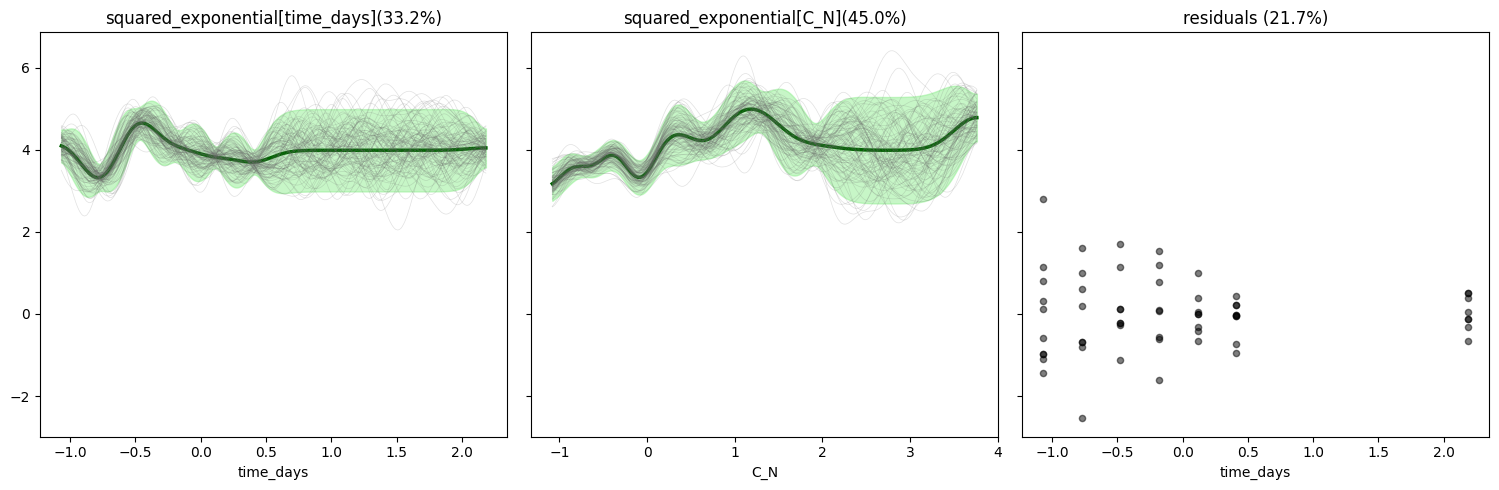

In [30]:
gps.plot_parts(
    out_label='ASV1', 
    x_axis_label='time_days',
    #unit_label=0
)

Finally, we might be interested in seeing the relationships found between outcomes during the search process. We can view this with a heatmap like the one shown below. Each row is an additive model component, each column is an outcome, and the filled in values are the explained variation of the outcome by that model component.